In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import tensorflow as tf

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fin_dt = drive.CreateFile({'id':'1DJz0dEcz85wP_g1frkri1NK0ewEjnY1z'}) # replace the id with id of file you want to access
fin_dt.GetContentFile('final_tran_dt.pkl') 

In [ ]:
fin_df=joblib.load("final_tran_dt.pkl")

In [ ]:
fin_df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,subscribed_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,26110,56,1933,19,44,2,-1,0,1,0,0,0,1,9,3,0,1,0,0,0,0,0,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,1,0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,1,0,1,0,0,5,3,0,0,0,0,0,0,0,0,1,0,0,0
3,43962,57,3287,22,867,1,84,3,0,0,0,0,0,6,2,1,0,0,0,0,1,0,0,0,0,0,0
4,29842,31,119,4,380,1,-1,0,1,0,1,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0


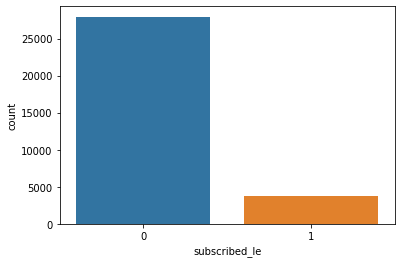

In [ ]:
count_plt=sns.countplot(x='subscribed_le',data=fin_df)

In [ ]:
c_relation=fin_df.corr()

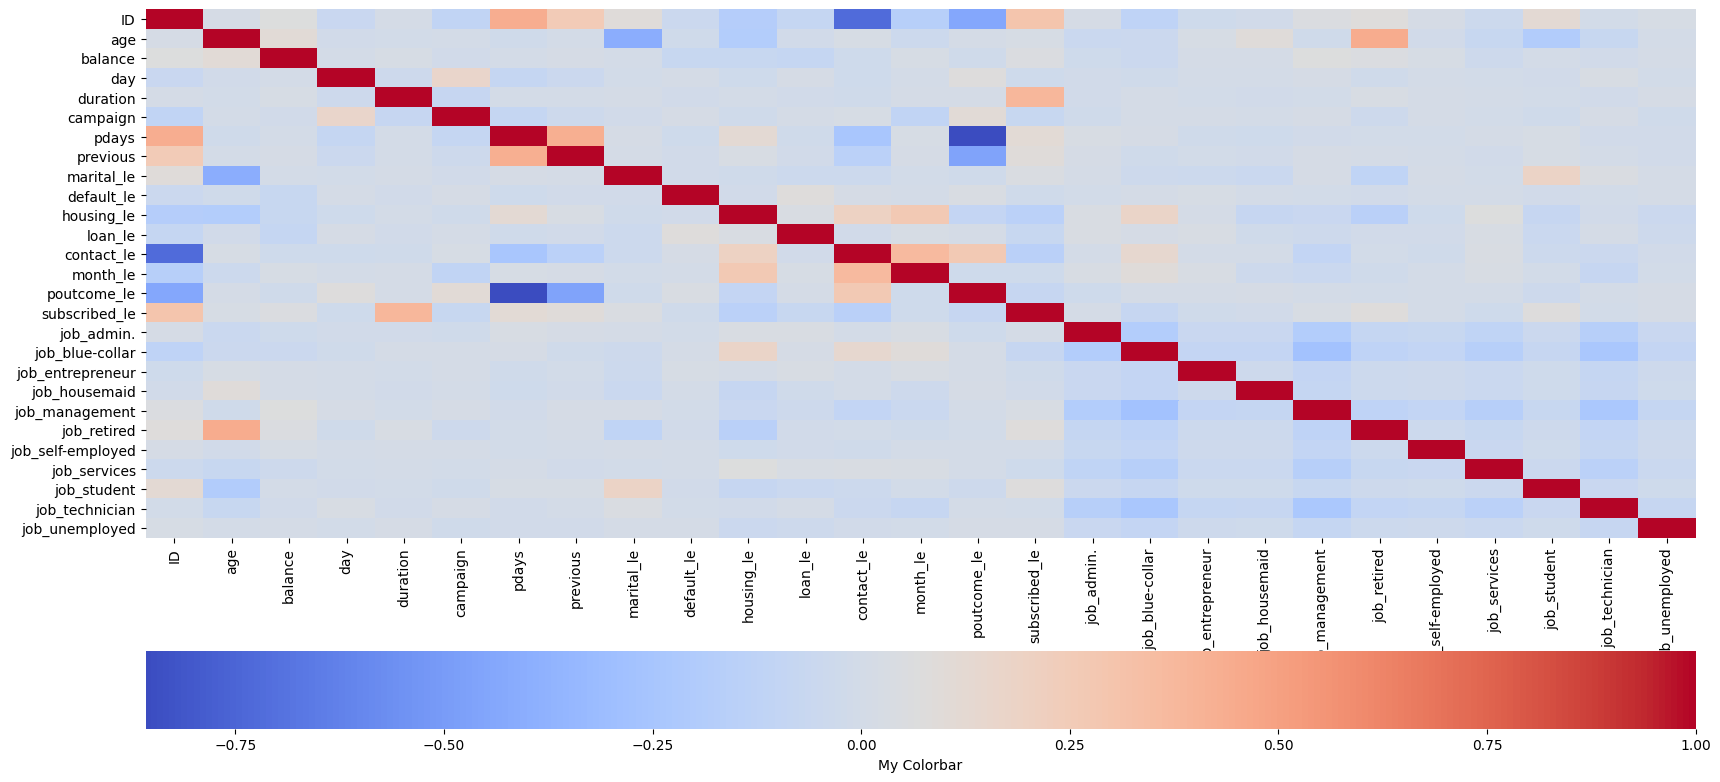

In [ ]:
plt.figure(figsize=(20,10),dpi=100)
#ht_map=sns.heatmap(c_relation,cmap='coolwarm',annot=True)
ht_map=sns.heatmap(c_relation,cmap='coolwarm',cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'})

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from random import randint

In [ ]:
x=fin_df.drop('subscribed_le',axis=1)
y=fin_df['subscribed_le']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25317 entries, 2246 to 5640
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 25317 non-null  int64
 1   age                25317 non-null  int64
 2   balance            25317 non-null  int64
 3   day                25317 non-null  int64
 4   duration           25317 non-null  int64
 5   campaign           25317 non-null  int64
 6   pdays              25317 non-null  int64
 7   previous           25317 non-null  int64
 8   marital_le         25317 non-null  int64
 9   default_le         25317 non-null  int64
 10  housing_le         25317 non-null  int64
 11  loan_le            25317 non-null  int64
 12  contact_le         25317 non-null  int64
 13  month_le           25317 non-null  int64
 14  poutcome_le        25317 non-null  int64
 15  job_admin.         25317 non-null  uint8
 16  job_blue-collar    25317 non-null  uint8
 17  job_entrep

In [ ]:
y_train.shape

(25317,)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6330 entries, 30184 to 13931
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 6330 non-null   int64
 1   age                6330 non-null   int64
 2   balance            6330 non-null   int64
 3   day                6330 non-null   int64
 4   duration           6330 non-null   int64
 5   campaign           6330 non-null   int64
 6   pdays              6330 non-null   int64
 7   previous           6330 non-null   int64
 8   marital_le         6330 non-null   int64
 9   default_le         6330 non-null   int64
 10  housing_le         6330 non-null   int64
 11  loan_le            6330 non-null   int64
 12  contact_le         6330 non-null   int64
 13  month_le           6330 non-null   int64
 14  poutcome_le        6330 non-null   int64
 15  job_admin.         6330 non-null   uint8
 16  job_blue-collar    6330 non-null   uint8
 17  job_entre

In [ ]:
y_test.shape

(6330,)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=100) # 0.25 x 0.8 = 0.2

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18987 entries, 29715 to 3236
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 18987 non-null  int64
 1   age                18987 non-null  int64
 2   balance            18987 non-null  int64
 3   day                18987 non-null  int64
 4   duration           18987 non-null  int64
 5   campaign           18987 non-null  int64
 6   pdays              18987 non-null  int64
 7   previous           18987 non-null  int64
 8   marital_le         18987 non-null  int64
 9   default_le         18987 non-null  int64
 10  housing_le         18987 non-null  int64
 11  loan_le            18987 non-null  int64
 12  contact_le         18987 non-null  int64
 13  month_le           18987 non-null  int64
 14  poutcome_le        18987 non-null  int64
 15  job_admin.         18987 non-null  uint8
 16  job_blue-collar    18987 non-null  uint8
 17  job_entre

In [ ]:
y_train.shape

(18987,)

In [ ]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6330 entries, 5473 to 24937
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 6330 non-null   int64
 1   age                6330 non-null   int64
 2   balance            6330 non-null   int64
 3   day                6330 non-null   int64
 4   duration           6330 non-null   int64
 5   campaign           6330 non-null   int64
 6   pdays              6330 non-null   int64
 7   previous           6330 non-null   int64
 8   marital_le         6330 non-null   int64
 9   default_le         6330 non-null   int64
 10  housing_le         6330 non-null   int64
 11  loan_le            6330 non-null   int64
 12  contact_le         6330 non-null   int64
 13  month_le           6330 non-null   int64
 14  poutcome_le        6330 non-null   int64
 15  job_admin.         6330 non-null   uint8
 16  job_blue-collar    6330 non-null   uint8
 17  job_entrep

In [ ]:
y_val.shape

(6330,)

In [ ]:
param_grid_dtrees=[{'max_depth': [3,None],'min_samples_leaf':[randint(1,9)],'criterion':['gini','entropy'],'splitter':['best','random']}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
model_dtrees=GridSearchCV(DecisionTreeClassifier(random_state=101),param_grid_dtrees,cv=10,scoring='accuracy')

In [ ]:
model_dtrees.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=101,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                  

In [ ]:
model_dtrees.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [ ]:
model_dtrees_pred=model_dtrees.predict(x_val)

In [ ]:
print(classification_report(y_val,model_dtrees_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5584
           1       0.58      0.58      0.58       746

    accuracy                           0.90      6330
   macro avg       0.76      0.76      0.76      6330
weighted avg       0.90      0.90      0.90      6330



In [ ]:
accuracy_score(y_val, model_dtrees_pred)

0.9006319115323854

In [ ]:
model_dtrees_best_estimator=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=4,splitter='best',random_state=123)

In [ ]:
model_dtrees_best_estimator.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
model_dtrees_pred_best_est=model_dtrees_best_estimator.predict(x_val)

In [ ]:
print(classification_report(y_val,model_dtrees_pred_best_est))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5584
           1       0.58      0.58      0.58       746

    accuracy                           0.90      6330
   macro avg       0.76      0.76      0.76      6330
weighted avg       0.90      0.90      0.90      6330



In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf=[{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}]

In [ ]:
param_grid1_rf=[{'bootstrap': [True, False],
 'max_depth': [10,20,30,40,50,60,70,80,90,100,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200]}]

In [ ]:
model_rf=GridSearchCV(RandomForestClassifier(random_state=123),param_grid1_rf,cv=5,scoring='accuracy')

In [ ]:
model_rf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=123,
                                 

In [ ]:
model_rf.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
rf1=RandomForestClassifier(bootstrap=True, max_depth=20, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=123)

In [ ]:
rf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [ ]:
rf1_pred=rf1.predict(x_val)

In [ ]:
print(confusion_matrix(y_val,rf1_pred))

[[5418  166]
 [ 382  364]]


In [ ]:
print(classification_report(y_val,rf1_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5584
           1       0.69      0.49      0.57       746

    accuracy                           0.91      6330
   macro avg       0.81      0.73      0.76      6330
weighted avg       0.90      0.91      0.91      6330



In [ ]:
from sklearn.svm import SVC
param_grid_svm=[{'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1.0,10.0,100.0,1000.0]},
                   {'kernel':['linear'],'C':[1.0,10.0,100.0,1000.0]},
                   {'kernel':['rbf','linear','poly','sigmoid'],'gamma':[1e-3,1e-4],'C':[1.0,10.0,100.0,1000.0]}]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()  
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train_tf = scaler.transform(x_train)  
x_test_tf = scaler.transform(x_test) 
x_val_tf = scaler.transform(x_val) 

In [ ]:
model_SVC1=SVC()

In [ ]:
model_SVC1.fit(x_train_tf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVC1_pred=model_SVC1.predict(x_val_tf)

In [ ]:
print(classification_report(y_val,SVC1_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5584
           1       0.67      0.28      0.40       746

    accuracy                           0.90      6330
   macro avg       0.79      0.63      0.67      6330
weighted avg       0.88      0.90      0.88      6330



In [ ]:
model_SVC2=SVC(kernel='linear')

In [ ]:
model_SVC2.fit(x_train_tf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVC2_pred=model_SVC2.predict(x_val_tf)

In [ ]:
print(classification_report(y_val,SVC2_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5584
           1       0.64      0.15      0.25       746

    accuracy                           0.89      6330
   macro avg       0.77      0.57      0.59      6330
weighted avg       0.87      0.89      0.86      6330



In [ ]:
model_SVC3=SVC(kernel='poly')

In [ ]:
model_SVC3.fit(x_train_tf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVC3_pred=model_SVC3.predict(x_val_tf)

In [ ]:
print(classification_report(y_val,SVC3_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5584
           1       0.69      0.29      0.41       746

    accuracy                           0.90      6330
   macro avg       0.80      0.64      0.68      6330
weighted avg       0.89      0.90      0.88      6330



In [ ]:
model_SVC4=SVC(C=1, gamma='scale', kernel='rbf')

In [ ]:
model_SVC4.fit(x_train_tf,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVC4_pred=model_SVC4.predict(x_val_tf)

In [ ]:
print(classification_report(y_val,SVC4_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5584
           1       0.67      0.28      0.40       746

    accuracy                           0.90      6330
   macro avg       0.79      0.63      0.67      6330
weighted avg       0.88      0.90      0.88      6330



In [ ]:
model_SVC5=SVC(C=10, gamma='scale', kernel='rbf')

In [ ]:
model_SVC5.fit(x_train_tf,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVC5_pred=model_SVC5.predict(x_val_tf)

In [ ]:
print(classification_report(y_val,SVC5_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5584
           1       0.65      0.39      0.49       746

    accuracy                           0.90      6330
   macro avg       0.79      0.68      0.72      6330
weighted avg       0.89      0.90      0.89      6330



In [ ]:
param_grid1={'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001,'scale','auto'],'kernel':['poly','sigmoid','rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid1,cv=3,refit=True,verbose=3)

In [ ]:
grid.fit(x_train_tf,y_train)

Fitting 3 folds for each of 105 candidates, totalling 315 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.879, total= 4.3min
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.879, total= 3.2min
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.5min remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.881, total= 2.9min
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.821, total=   3.9s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.834, total=   3.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.835, total=   3.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.885, total=  18.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.885, total=  18.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.885, total=  18.3s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

In [ ]:
param_grid2={'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001,'scale','auto'],'kernel':['sigmoid','rbf']}

In [ ]:
grid2 = GridSearchCV(SVC(),param_grid2,cv=3,refit=True,verbose=3)

In [ ]:
grid2.fit(x_train_tf,y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.821, total=   4.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.834, total=   3.7s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.835, total=   4.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.885, total=  19.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.885, total=  19.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.885, total=  19.4s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.852, total=   4.4s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.860, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.851, total=   4.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed: 21.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['sigmoid', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid2.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
model_best_SVC=SVC(C=100, gamma= 0.01, kernel= 'rbf')

In [ ]:
model_best_SVC.fit(x_train_tf,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_best_SVC_pred=model_best_SVC.predict(x_val_tf)

In [ ]:
print(classification_report(y_val,model_best_SVC_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5584
           1       0.65      0.38      0.48       746

    accuracy                           0.90      6330
   macro avg       0.79      0.67      0.71      6330
weighted avg       0.89      0.90      0.89      6330



In [ ]:
#neural networks

In [ ]:
model = Sequential()
model.add(Dense(69, input_dim=26, activation='relu'))
model.add(Dense(46, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1899/1899 [==============================] - 4s 2ms/step - loss: 28.6143 - accuracy: 0.7905
Epoch 2/150
1899/1899 [==============================] - 4s 2ms/step - loss: 17.3970 - accuracy: 0.8156
Epoch 3/150
1899/1899 [==============================] - 4s 2ms/step - loss: 11.3508 - accuracy: 0.8257
Epoch 4/150
1899/1899 [==============================] - 4s 2ms/step - loss: 8.5334 - accuracy: 0.8252
Epoch 5/150
1899/1899 [==============================] - 4s 2ms/step - loss: 5.7689 - accuracy: 0.8298
Epoch 6/150
1899/1899 [==============================] - 4s 2ms/step - loss: 3.9602 - accuracy: 0.8341
Epoch 7/150
1899/1899 [==============================] - 4s 2ms/step - loss: 2.7324 - accuracy: 0.8410
Epoch 8/150
1899/1899 [==============================] - 4s 2ms/step - loss: 1.8663 - accuracy: 0.8434
Epoch 9/150
1899/1899 [==============================] - 4s 2ms/step - loss: 1.3209 - accuracy: 0.8467
Epoch 10/150
1899/1899 [==============================] - 4s 2ms/step 

In [ ]:
model1 = Sequential()
model1.add(Dense(200, input_dim=26, activation='relu'))
model1.add(Dense(105, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3639 - accuracy: 0.8826
Epoch 2/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3587 - accuracy: 0.8847
Epoch 3/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3583 - accuracy: 0.8847
Epoch 4/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3583 - accuracy: 0.8847
Epoch 5/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3584 - accuracy: 0.8847
Epoch 6/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3583 - accuracy: 0.8847
Epoch 7/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3585 - accuracy: 0.8847
Epoch 8/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3583 - accuracy: 0.8847
Epoch 9/200
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3587 - accuracy: 0.8847
Epoch 10/200
1899/1899 [==============================] - 4s 2ms/step - l

In [ ]:
_, accuracy1 = model1.evaluate(x_val, y_val)

198/198 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8821


In [ ]:
#_, accuracy = model.evaluate(x_val, y_val)

In [ ]:
#feature engg

#retaining features duration, campaign, pday, previous, housing_le, contact_le, job_retired, job_student

In [ ]:
x_fe=fin_df[['duration','campaign','pdays','previous','housing_le','loan_le','contact_le','job_blue-collar','job_management','job_retired','job_services','job_student']]
y_fe=fin_df['subscribed_le']

In [ ]:
x_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   duration         31647 non-null  int64
 1   campaign         31647 non-null  int64
 2   pdays            31647 non-null  int64
 3   previous         31647 non-null  int64
 4   housing_le       31647 non-null  int64
 5   loan_le          31647 non-null  int64
 6   contact_le       31647 non-null  int64
 7   job_blue-collar  31647 non-null  uint8
 8   job_management   31647 non-null  uint8
 9   job_retired      31647 non-null  uint8
 10  job_services     31647 non-null  uint8
 11  job_student      31647 non-null  uint8
dtypes: int64(7), uint8(5)
memory usage: 1.8 MB


In [ ]:
x_train_fe,x_test_fe,y_train_fe,y_test_fe=train_test_split(x_fe,y_fe,test_size=0.2,random_state=100)

In [ ]:
x_train_fe, x_val_fe, y_train_fe, y_val_fe = train_test_split(x_train_fe, y_train_fe, test_size=0.25, random_state=100) # 0.25 x 0.8 = 0.2

In [ ]:
model_dtrees_fe=GridSearchCV(DecisionTreeClassifier(random_state=101),param_grid_dtrees,cv=10,scoring='accuracy')

In [ ]:
model_dtrees_fe.fit(x_train_fe,y_train_fe)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=101,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                  

In [ ]:
model_dtrees_fe.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [ ]:
model_dtrees_pred_fe=model_dtrees_fe.predict(x_val_fe)

NameError: ignored

In [ ]:
print(classification_report(y_val_fe,model_dtrees_pred_fe))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5584
           1       0.57      0.24      0.34       746

    accuracy                           0.89      6330
   macro avg       0.74      0.61      0.64      6330
weighted avg       0.87      0.89      0.87      6330



In [ ]:
model_dtrees_best_estimator_fe=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=4,splitter='best',random_state=123)

In [ ]:
model_dtrees_best_estimator_fe.fit(x_train_fe,y_train_fe)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
model_dtrees_pred_best_est_fe=model_dtrees_best_estimator_fe.predict(x_val_fe)

In [ ]:
print(classification_report(y_val_fe,model_dtrees_pred_best_est_fe))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5584
           1       0.57      0.24      0.34       746

    accuracy                           0.89      6330
   macro avg       0.74      0.61      0.64      6330
weighted avg       0.87      0.89      0.87      6330



In [ ]:
#Random Forest with fe

In [ ]:
model_rf_fe=GridSearchCV(RandomForestClassifier(random_state=123),param_grid1_rf,cv=5,scoring='accuracy')

In [ ]:
model_rf_fe.fit(x_train_fe,y_train_fe)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=123,
                                 

In [ ]:
model_rf_fe.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
model_rf_best_estimator_fe1=RandomForestClassifier(bootstrap=False,max_depth=10,max_features='auto',min_samples_leaf=1,min_samples_split=5,n_estimators=200)

In [ ]:
model_rf_best_estimator_fe1.fit(x_train_fe,y_train_fe)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_rf_best_pred_fe=model_rf_best_estimator_fe1.predict(x_val_fe)

In [ ]:
print(classification_report(y_val_fe,model_rf_best_pred_fe))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5584
           1       0.62      0.28      0.38       746

    accuracy                           0.89      6330
   macro avg       0.76      0.63      0.66      6330
weighted avg       0.88      0.89      0.88      6330

